In [3]:
import pandas as pd
GO_df = pd.read_csv("GO_enrichment_result_with_description.csv")
GO_df

,cluster_id,number_of_genes,enriched_GO,p_value,overlapped_number_of_genes,total_genes_in_the_term,adjusted_p_value,term_description
0,2,347,GO:0031072,9.570751e-03,3,27,0.037527,heat shock protein binding
1,2,347,GO:0006629,2.867729e-01,4,165,0.483987,lipid metabolic process
2,2,347,GO:0006979,9.207711e-01,2,252,1.000000,response to oxidative stress
3,2,347,GO:0016987,8.445938e-05,3,6,0.001061,bacterial sigma factor activity
4,2,347,GO:0020037,9.793338e-01,6,719,1.000000,heme binding
5,2,347,GO:0004672,1.000000e+00,2,1517,1.000000,protein kinase activity
6,2,347,GO:0015995,1.041695e-06,4,6,0.000030,chlorophyll biosynthetic process
7,2,347,GO:0016620,1.285460e-01,2,38,0.260843,"oxidoreductase activity, acting on the aldehyd..."
8,2,347,GO:0046872,9.573555e-01,4,481,1.000000,metal ion binding
9,2,347,GO:0008270,9.999997e-01,3,1205,1.000000,zinc ion binding


In [4]:
my_enriched_go = GO_df[GO_df.adjusted_p_value <= 0.05].enriched_GO.tolist()
my_enriched_go = list(set(my_enriched_go))
print len(my_enriched_go)

236


In [5]:
my_enriched_id = GO_df[GO_df.adjusted_p_value <= 0.05].cluster_id.tolist()
my_enriched_id = list(set(my_enriched_id))
print len(my_enriched_id)

14


In [9]:
import numpy as np
my_GO_heatmap_df = pd.DataFrame(np.zeros((len(my_enriched_go),len(my_enriched_id))))
my_GO_heatmap_df.index = my_enriched_go
my_GO_heatmap_df.columns = my_enriched_id
from math import log
# -log(8.02392282388E-37,10)
for row in GO_df.index:
    j = GO_df.at[row,'cluster_id']
    i = GO_df.at[row,'term_description']
    my_value = GO_df.at[row,'adjusted_p_value']
    if i not in my_enriched_go:
        continue
    if j not in my_enriched_id:
        continue
    my_GO_heatmap_df.set_value(i,j,-log(my_value,10))
#     my_GO_heatmap_df.set_value(i,j,my_value)




In [10]:
my_GO_heatmap_df.shape

(236, 14)

In [11]:
import requests, sys

requestURL = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/GO%3A0003735/ancestors?relations=is_a%2Cpart_of%2Coccurs_in%2Cregulates"

r = requests.get(requestURL, headers={ "Accept" : "application/json"})

if not r.ok:
  r.raise_for_status()
  sys.exit()

responseBody = r.text
print(responseBody)

{"numberOfHits":1,"results":[{"id":"GO:0003735","isObsolete":false,"name":"structural constituent of ribosome","definition":{"text":"The action of a molecule that contributes to the structural integrity of the ribosome."},"comment":"Note that this term may be used to annotate ribosomal RNAs as well as ribosomal proteins.","ancestors":["GO:0003735","GO:0005198","GO:0003674"],"synonyms":[{"name":"ribosomal protein","type":"broad"},{"name":"ribosomal RNA","type":"related"}],"aspect":"molecular_function","usage":"Unrestricted"}],"pageInfo":null}


In [12]:
import json
my_dict = json.loads(responseBody)
print my_dict['results'][0]['ancestors']

[u'GO:0003735', u'GO:0005198', u'GO:0003674']


In [14]:
def get_depth(id):
	requestURL = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/GO_ID/ancestors?relations=is_a%2Cpart_of%2Coccurs_in%2Cregulates"
	requestURL = requestURL.replace("GO_ID",id)
	r = requests.get(requestURL, headers={ "Accept" : "application/json"})

	if not r.ok:
		r.raise_for_status()
		sys.exit()

	responseBody = r.text
	my_dict = json.loads(responseBody)
	return len(my_dict['results'][0]['ancestors'])

In [16]:
my_term = []
for row in GO_df.index:
    i = GO_df.at[row,'enriched_GO']
    print i
    my_term.append(get_depth(i))

GO:0031072
GO:0006629
GO:0006979
GO:0016987
GO:0020037
GO:0004672
GO:0015995
GO:0016620
GO:0046872
GO:0008270
GO:0003676
GO:0003677
GO:0006355
GO:0006352
GO:0042578
GO:0005737
GO:0006006
GO:0016149
GO:0005840
GO:0050661
GO:0004252
GO:0000166
GO:0016779
GO:0051537
GO:0006468
GO:0004222
GO:0019898
GO:0016491
GO:0000413
GO:0016705
GO:0022900
GO:0008168
GO:0005524
GO:0005525
GO:0003824
GO:0051082
GO:0050662
GO:0019843
GO:0015979
GO:0010277
GO:0008152
GO:0055085
GO:0009055
GO:0015031
GO:0015969
GO:0006457
GO:0005509
GO:0005506
GO:0009522
GO:0009523
GO:0010181
GO:0003747
GO:0042132
GO:0016021
GO:0016020
GO:0016209
GO:0003746
GO:0003743
GO:0042651
GO:0005515
GO:0009538
GO:0055114
GO:0003755
GO:0006508
GO:0051536
GO:0009058
GO:0009507
GO:0051287
GO:0005622
GO:0003723
GO:0003924
GO:0016787
GO:0006096
GO:0003735
GO:0004332
GO:0006415
GO:0006414
GO:0006413
GO:0006412
GO:0005975
GO:0003700
GO:0016887
GO:0004601
GO:0009654
GO:0045454
GO:0017176
GO:0006284
GO:0006281
GO:0031072
GO:0005488
GO:0006629

GO:0005634
GO:0003755
GO:0006506
GO:0006508
GO:0009982
GO:0051536
GO:0009432
GO:0009058
GO:0016876
GO:0000077
GO:0051287
GO:0003918
GO:0008479
GO:0000910
GO:0015934
GO:0015935
GO:0005622
GO:0003723
GO:0003729
GO:0030529
GO:0006400
GO:0006401
GO:0004576
GO:0008242
GO:0003924
GO:0019867
GO:0006886
GO:0008641
GO:0016787
GO:0016788
GO:0016255
GO:0006520
GO:0003735
GO:0031047
GO:0006418
GO:0006414
GO:0006413
GO:0006412
GO:0004812
GO:0004818
GO:0004386
GO:0018024
GO:0046983
GO:0046982
GO:0019773
GO:0016272
GO:0006479
GO:0030983
GO:0005815
GO:0005975
GO:0003700
GO:0006396
GO:0006397
GO:0030870
GO:0006606
GO:0009451
GO:0004826
GO:0004828
GO:0000398
GO:0004553
GO:0016887
GO:0006950
GO:0034968
GO:0008536
GO:0043044
GO:0006164
GO:0008017
GO:0000723
GO:0007010
GO:0045454
GO:0005839
GO:0004298
GO:0004672
GO:0046872
GO:0003676
GO:0005737
GO:0005840
GO:0000166
GO:0006468
GO:0008312
GO:0016491
GO:0005524
GO:0006810
GO:0003824
GO:0008152
GO:0000049
GO:0006457
GO:0016021
GO:0016020
GO:0003743
GO:0009089

In [17]:
GO_df['GO_depth'] = my_term
GO_df

,cluster_id,number_of_genes,enriched_GO,p_value,overlapped_number_of_genes,total_genes_in_the_term,adjusted_p_value,term_description,GO_depth
0,2,347,GO:0031072,9.570751e-03,3,27,0.037527,heat shock protein binding,4
1,2,347,GO:0006629,2.867729e-01,4,165,0.483987,lipid metabolic process,5
2,2,347,GO:0006979,9.207711e-01,2,252,1.000000,response to oxidative stress,4
3,2,347,GO:0016987,8.445938e-05,3,6,0.001061,bacterial sigma factor activity,29
4,2,347,GO:0020037,9.793338e-01,6,719,1.000000,heme binding,7
5,2,347,GO:0004672,1.000000e+00,2,1517,1.000000,protein kinase activity,27
6,2,347,GO:0015995,1.041695e-06,4,6,0.000030,chlorophyll biosynthetic process,29
7,2,347,GO:0016620,1.285460e-01,2,38,0.260843,"oxidoreductase activity, acting on the aldehyd...",8
8,2,347,GO:0046872,9.573555e-01,4,481,1.000000,metal ion binding,5
9,2,347,GO:0008270,9.999997e-01,3,1205,1.000000,zinc ion binding,7


In [18]:
GO_df.to_csv("GO_enrichment_result_with_description_with_depth.csv",index=False)

In [20]:
GO_df = GO_df[GO_df.GO_depth > 2]

In [27]:
GO_df

,cluster_id,number_of_genes,enriched_GO,p_value,overlapped_number_of_genes,total_genes_in_the_term,adjusted_p_value,term_description,GO_depth
0,2,347,GO:0031072,9.570751e-03,3,27,0.037527,heat shock protein binding,4
1,2,347,GO:0006629,2.867729e-01,4,165,0.483987,lipid metabolic process,5
2,2,347,GO:0006979,9.207711e-01,2,252,1.000000,response to oxidative stress,4
3,2,347,GO:0016987,8.445938e-05,3,6,0.001061,bacterial sigma factor activity,29
4,2,347,GO:0020037,9.793338e-01,6,719,1.000000,heme binding,7
5,2,347,GO:0004672,1.000000e+00,2,1517,1.000000,protein kinase activity,27
6,2,347,GO:0015995,1.041695e-06,4,6,0.000030,chlorophyll biosynthetic process,29
7,2,347,GO:0016620,1.285460e-01,2,38,0.260843,"oxidoreductase activity, acting on the aldehyd...",8
8,2,347,GO:0046872,9.573555e-01,4,481,1.000000,metal ion binding,5
9,2,347,GO:0008270,9.999997e-01,3,1205,1.000000,zinc ion binding,7


In [33]:
import numpy as np

my_enriched_go = GO_df[GO_df.adjusted_p_value <= 0.05].term_description.tolist()
my_enriched_go = list(set(my_enriched_go))
print len(my_enriched_go)
my_enriched_id = GO_df[GO_df.adjusted_p_value <= 0.05].cluster_id.tolist()
my_enriched_id = list(set(my_enriched_id))
print len(my_enriched_id)
my_GO_heatmap_df = pd.DataFrame(np.zeros((len(my_enriched_go),len(my_enriched_id))))
my_GO_heatmap_df.index = my_enriched_go
my_GO_heatmap_df.columns = my_enriched_id
from math import log
# -log(8.02392282388E-37,10)
for row in GO_df.index:
    j = GO_df.at[row,'cluster_id']
    i = GO_df.at[row,'term_description']
    my_value = GO_df.at[row,'adjusted_p_value']
    if my_value > 0.05:
        continue
#     print my_value
    if i not in my_enriched_go:
        continue
    if j not in my_enriched_id:
        continue
    
    my_GO_heatmap_df.set_value(i,j,-log(my_value,10))
#     my_GO_heatmap_df.set_value(i,j,my_value)




234
14


In [22]:
my_GO_heatmap_df.shape

(234, 14)

In [40]:
my_GO_heatmap_df.to_csv("my_GO_heatmap_df.csv")

In [42]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = concatenate((linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in xrange(N+1) ]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

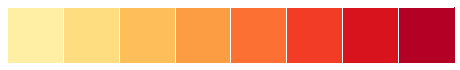

In [45]:
# cmap_discretize("YlOrRd",21)
sns.palplot(sns.color_palette("YlOrRd", n_colors=8))

In [2]:
import pandas as pd
my_GO_heatmap_df = pd.read_csv("my_GO_heatmap_df.csv",index_col=0)

my_GO_heatmap_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,21
regulation of anion transport,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.433456,0.000000,0.000000,0.0,0.000000
phosphoric ester hydrolase activity,0.000000,0.000000,0.000000,0.000000,1.476010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
metalloendopeptidase activity,0.000000,0.000000,0.000000,0.000000,2.157112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
microtubule organizing center organization,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.762794,0.000000,0.000000,0.0,0.000000
carotenoid biosynthetic process,0.000000,0.000000,0.000000,0.000000,5.669669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
protein transporter activity,0.000000,0.000000,0.000000,5.987632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
eukaryotic translation initiation factor 3 complex,5.492662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
tRNA (m1A) methyltransferase complex,2.528519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
vesicle-mediated transport,0.000000,0.000000,0.000000,29.064253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
protein folding,3.793688,0.000000,0.000000,0.000000,0.000000,0.000000,1.494373,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [82]:
int(my_GO_heatmap_df.max().max())

33

In [83]:
test_color=
test_color

[(1.0, 0.98449827082016894, 0.76210689614800842),
 (1.0, 0.96678200890036192, 0.71880047812181358),
 (1.0, 0.95128027972053075, 0.68090736234889315),
 (1.0, 0.93356401780072384, 0.6376009443226982),
 (0.99936947331709025, 0.91680123525507307, 0.60096887712385139),
 (0.99838523654376754, 0.89711649978862096, 0.5596309251645033),
 (0.99752402936711027, 0.87989235625547524, 0.52346021720007352),
 (0.99653979259378767, 0.86020762078902302, 0.48212226524072532),
 (0.99607843160629272, 0.8353863996617934, 0.44595156031496386),
 (0.99607843160629272, 0.79700116550221167, 0.40461361583541422),
 (0.99607843160629272, 0.76341408561257762, 0.36844291441580834),
 (0.99607843160629272, 0.72502885145299578, 0.3271049699362587),
 (0.99590926591087792, 0.69178010295419134, 0.29533257595464296),
 (0.99492502913755532, 0.65536334234125471, 0.27958478384158192),
 (0.99406382196089804, 0.6234986768049352, 0.26580546574265351),
 (0.99307958518757544, 0.58708191619199868, 0.25005767362959247),
 (0.992095348

In [85]:
test_color = [(1,1,1)] + test_color

In [86]:
test_color

[(1, 1, 1),
 (1.0, 0.98449827082016894, 0.76210689614800842),
 (1.0, 0.96678200890036192, 0.71880047812181358),
 (1.0, 0.95128027972053075, 0.68090736234889315),
 (1.0, 0.93356401780072384, 0.6376009443226982),
 (0.99936947331709025, 0.91680123525507307, 0.60096887712385139),
 (0.99838523654376754, 0.89711649978862096, 0.5596309251645033),
 (0.99752402936711027, 0.87989235625547524, 0.52346021720007352),
 (0.99653979259378767, 0.86020762078902302, 0.48212226524072532),
 (0.99607843160629272, 0.8353863996617934, 0.44595156031496386),
 (0.99607843160629272, 0.79700116550221167, 0.40461361583541422),
 (0.99607843160629272, 0.76341408561257762, 0.36844291441580834),
 (0.99607843160629272, 0.72502885145299578, 0.3271049699362587),
 (0.99590926591087792, 0.69178010295419134, 0.29533257595464296),
 (0.99492502913755532, 0.65536334234125471, 0.27958478384158192),
 (0.99406382196089804, 0.6234986768049352, 0.26580546574265351),
 (0.99307958518757544, 0.58708191619199868, 0.25005767362959247),
 

In [65]:
sns.palplot(sns.color_palette("YlOrRd", n_colors=int(my_GO_heatmap_df.max().max())))

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.66848466],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.49437311],
       [ 0.        ,  0.        ,  0.        , ...,  2.0505984 ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage,leaves_list
linkage_matrix = linkage(my_GO_heatmap_df.values.T,method="ward")
col_reorder = leaves_list(linkage_matrix)
print col_reorder

[ 0  3  2  1 11  4  5  7 13  9 10  6  8 12]


In [16]:
len(col_reorder)

14

In [7]:
col_reorder_names = my_GO_heatmap_df.columns[col_reorder].tolist()

In [10]:
col_reorder_names

['1', '4', '3', '2', '12', '5', '6', '8', '21', '10', '11', '7', '9', '13']

In [27]:
my_col_color = pd.DataFrame()
my_col_color['name'] = col_reorder_names
my_col_color['color'] = col_color
my_col_color.set_index('name',inplace=True)
my_col_color

,color
name,
1,"(0.86, 0.3712, 0.34)"
4,"(0.86, 0.816914285714, 0.34)"
3,"(0.86, 0.668342857143, 0.34)"
2,"(0.86, 0.519771428571, 0.34)"
12,"(0.34, 0.754514285714, 0.86)"
5,"(0.754514285714, 0.86, 0.34)"
6,"(0.605942857143, 0.86, 0.34)"
8,"(0.34, 0.86, 0.3712)"
21,"(0.86, 0.34, 0.457371428571)"


In [24]:
current_palette = sns.color_palette("hls", 21)
a = dict(zip(map(lambda x:str(x),range(1,22)), current_palette))
print a
my_GO_heatmap_df.columns[col_reorder].map(a)

{'11': (0.33999999999999997, 0.86, 0.8169142857142857), '10': (0.33999999999999997, 0.86, 0.66834285714285713), '13': (0.33999999999999997, 0.60594285714285712, 0.86), '12': (0.33999999999999997, 0.7545142857142858, 0.86), '15': (0.37119999999999997, 0.33999999999999997, 0.86), '14': (0.33999999999999997, 0.45737142857142832, 0.86), '17': (0.66834285714285679, 0.33999999999999997, 0.86), '16': (0.51977142857142811, 0.33999999999999997, 0.86), '19': (0.86, 0.33999999999999997, 0.7545142857142858), '18': (0.81691428571428548, 0.33999999999999997, 0.86), '20': (0.86, 0.33999999999999997, 0.60594285714285712), '1': (0.86, 0.37119999999999997, 0.33999999999999997), '3': (0.86, 0.66834285714285713, 0.33999999999999997), '2': (0.86, 0.51977142857142855, 0.33999999999999997), '5': (0.7545142857142858, 0.86, 0.33999999999999997), '4': (0.86, 0.8169142857142857, 0.33999999999999997), '7': (0.45737142857142832, 0.86, 0.33999999999999997), '6': (0.60594285714285712, 0.86, 0.33999999999999997), '9'

TypeError: 'dict' object is not callable

In [11]:
import seaborn as sns
current_palette = sns.color_palette("hls", 21)
a = dict(zip(range(1,22), current_palette))
print a
col_color = map(lambda x:a[int(x)],col_reorder_names)
col_color

{1: (0.86, 0.37119999999999997, 0.33999999999999997), 2: (0.86, 0.51977142857142855, 0.33999999999999997), 3: (0.86, 0.66834285714285713, 0.33999999999999997), 4: (0.86, 0.8169142857142857, 0.33999999999999997), 5: (0.7545142857142858, 0.86, 0.33999999999999997), 6: (0.60594285714285712, 0.86, 0.33999999999999997), 7: (0.45737142857142832, 0.86, 0.33999999999999997), 8: (0.33999999999999997, 0.86, 0.37119999999999997), 9: (0.33999999999999997, 0.86, 0.51977142857142855), 10: (0.33999999999999997, 0.86, 0.66834285714285713), 11: (0.33999999999999997, 0.86, 0.8169142857142857), 12: (0.33999999999999997, 0.7545142857142858, 0.86), 13: (0.33999999999999997, 0.60594285714285712, 0.86), 14: (0.33999999999999997, 0.45737142857142832, 0.86), 15: (0.37119999999999997, 0.33999999999999997, 0.86), 16: (0.51977142857142811, 0.33999999999999997, 0.86), 17: (0.66834285714285679, 0.33999999999999997, 0.86), 18: (0.81691428571428548, 0.33999999999999997, 0.86), 19: (0.86, 0.33999999999999997, 0.754514

[(0.86, 0.37119999999999997, 0.33999999999999997),
 (0.86, 0.8169142857142857, 0.33999999999999997),
 (0.86, 0.66834285714285713, 0.33999999999999997),
 (0.86, 0.51977142857142855, 0.33999999999999997),
 (0.33999999999999997, 0.7545142857142858, 0.86),
 (0.7545142857142858, 0.86, 0.33999999999999997),
 (0.60594285714285712, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.37119999999999997),
 (0.86, 0.33999999999999997, 0.45737142857142832),
 (0.33999999999999997, 0.86, 0.66834285714285713),
 (0.33999999999999997, 0.86, 0.8169142857142857),
 (0.45737142857142832, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.51977142857142855),
 (0.33999999999999997, 0.60594285714285712, 0.86)]

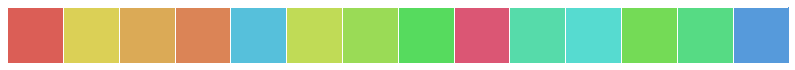

In [21]:
sns.palplot(col_color)

In [22]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
row_colors

0      r
1      r
2      r
3      r
4      r
5      r
6      r
7      r
8      r
9      r
10     r
11     r
12     r
13     r
14     r
15     r
16     r
17     r
18     r
19     r
20     r
21     r
22     r
23     r
24     r
25     r
26     r
27     r
28     r
29     r
      ..
120    g
121    g
122    g
123    g
124    g
125    g
126    g
127    g
128    g
129    g
130    g
131    g
132    g
133    g
134    g
135    g
136    g
137    g
138    g
139    g
140    g
141    g
142    g
143    g
144    g
145    g
146    g
147    g
148    g
149    g
Name: species, Length: 150, dtype: object

In [15]:
len(col_color)

14

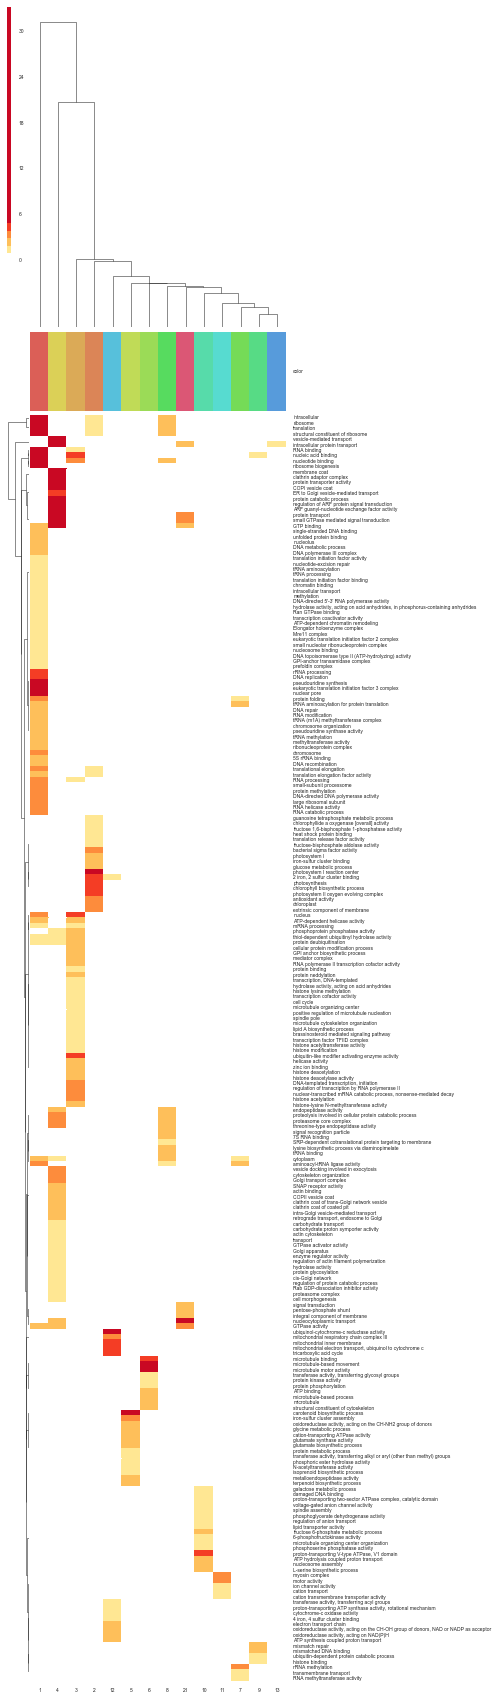

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
%matplotlib inline
sns.set(color_codes=True)
sns.set(font_scale=0.5)
# fig = pylab.figure(figsize=(10,20))
colors = sns.color_palette("YlOrRd", n_colors=5)
# print [colors[0]] * 5
# myColors = [(1,1,1)]+[colors[0]] * 5 + [colors[1]] * 5+ [colors[2]]* 5+ [colors[3]] * 5+ [colors[4]] * 11
# myColors = [(1,1,1)]+[colors[0]] * 5 + [colors[1]] * 5+ [colors[2]]* 23
myColors = [(1,1,1)]+colors[:-1] + [colors[-1]] * 29
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
# cmap = ListedColormap( myColors,'Custom', len(myColors))

plot=sns.clustermap(my_GO_heatmap_df,cmap=cmap,method="ward",figsize=(5,30),col_colors = my_col_color,robust=False)
# plt.setp(plot.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# colorbar  = plot.ax_heatmap.collections[0].colorbar
# colorbar.set_ticks([0, 1, 2,3,4,5,34])
# colorbar.set_ticklabels(['0-1', '1-2', '2-3', '3-4', '4-5', '5-34'])
# colorbar.set_label(['xxxxxxx', '1-2', '2-3', '3-4', '4-5', '5-34'])

In [29]:
plot.savefig("G O_heatmap_05.png",dpi=1000)

In [30]:
# plot.ax_heatmap.collections[0].colorbar
colorbar  = plot.ax_heatmap.collections[0].colorbar
colorbar.set_ticks([0, 1, 2,3,4,5,34])
colorbar.set_ticklabels(['0-1', '1-2', '2-3', '3-4', '4-5', '5-34'])
colorbar.set_label(['0-1', '1-2', '2-3', '3-4', '4-5', '5-34'])